# **Loading and Exploring the data**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic info
print("Customers Data Info:")
print(customers.info())
print("\nProducts Data Info:")
print(products.info())
print("\nTransactions Data Info:")
print(transactions.info())

Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [8]:
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [9]:
# Check for missing values
def missing_values(df, name):
    print(f"Missing Values in {name}:")
    print(df.isnull().sum())
    print("-"*40)

missing_values(customers, "Customers")
missing_values(products, "Products")
missing_values(transactions, "Transactions")

# Check for duplicate entries
def check_duplicates(df, name):
    print(f"Duplicate Entries in {name}: {df.duplicated().sum()}")

check_duplicates(customers, "Customers")
check_duplicates(products, "Products")
check_duplicates(transactions, "Transactions")

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
----------------------------------------
Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
----------------------------------------
Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
----------------------------------------
Duplicate Entries in Customers: 0
Duplicate Entries in Products: 0
Duplicate Entries in Transactions: 0


# **Understanding Customers Data**

<ipython-input-10-0eb3ea204d97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


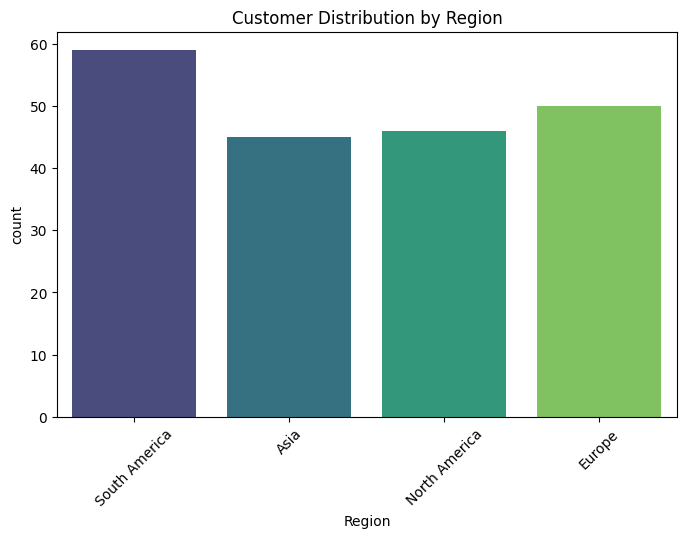

In [10]:
# Region Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.show()

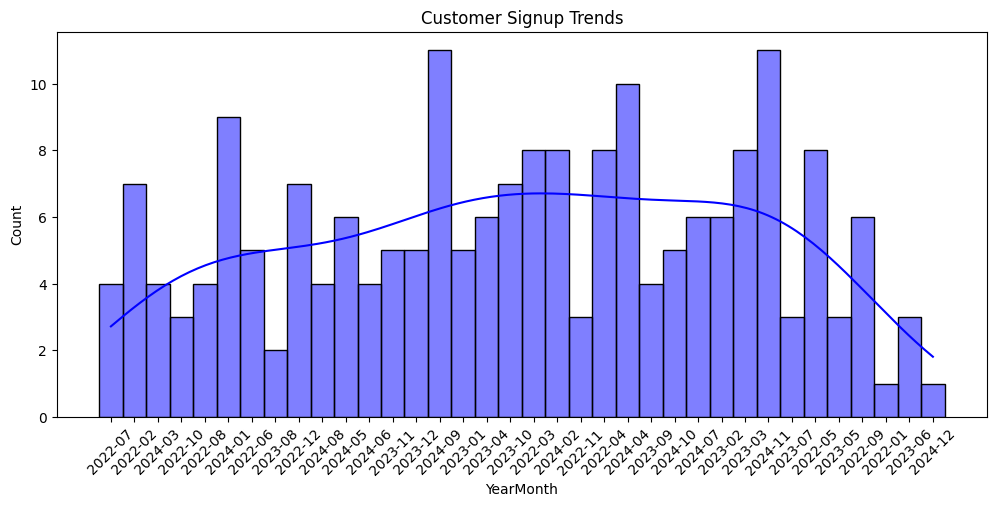

In [11]:
# Signup trends
df_signup = customers.copy()
df_signup["SignupDate"] = pd.to_datetime(df_signup["SignupDate"])
df_signup["YearMonth"] = df_signup["SignupDate"].dt.to_period("M")

plt.figure(figsize=(12,5))
sns.histplot(df_signup["YearMonth"].astype(str), bins=30, kde=True, color='blue')
plt.title("Customer Signup Trends")
plt.xticks(rotation=45)
plt.show()

# **Understanding Products Data**

<ipython-input-12-489d6a4c3ed4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)


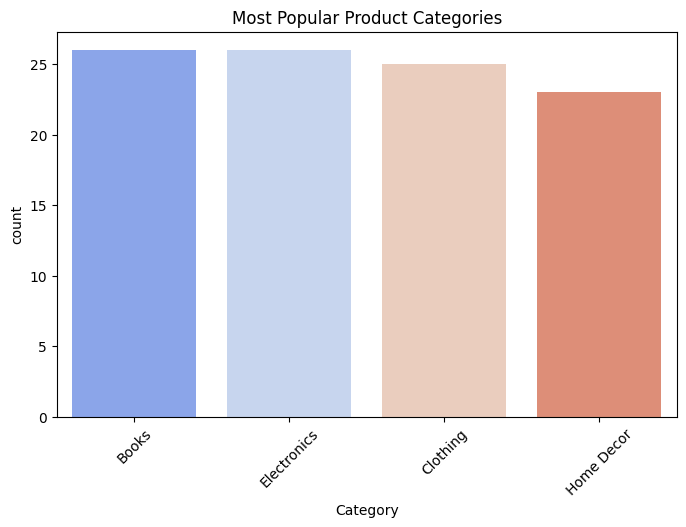

In [12]:
# Top product categories
plt.figure(figsize=(8,5))
sns.countplot(data=products, x='Category', palette='coolwarm', order=products['Category'].value_counts().index)
plt.title("Most Popular Product Categories")
plt.xticks(rotation=45)
plt.show()

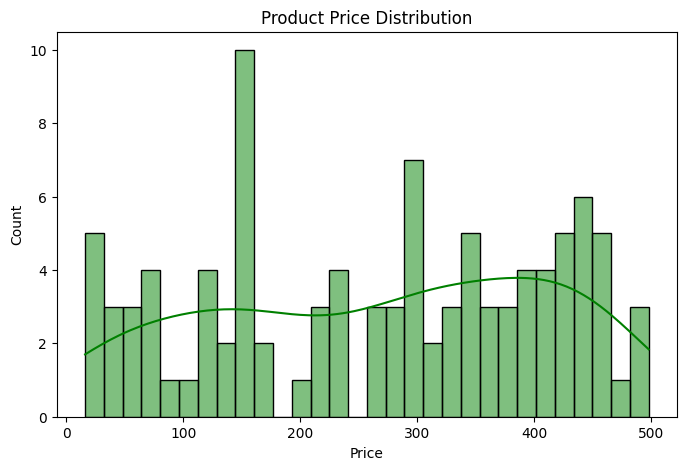

In [13]:
# Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(products['Price'], bins=30, kde=True, color='green')
plt.title("Product Price Distribution")
plt.show()

# **Transaction Analysis**

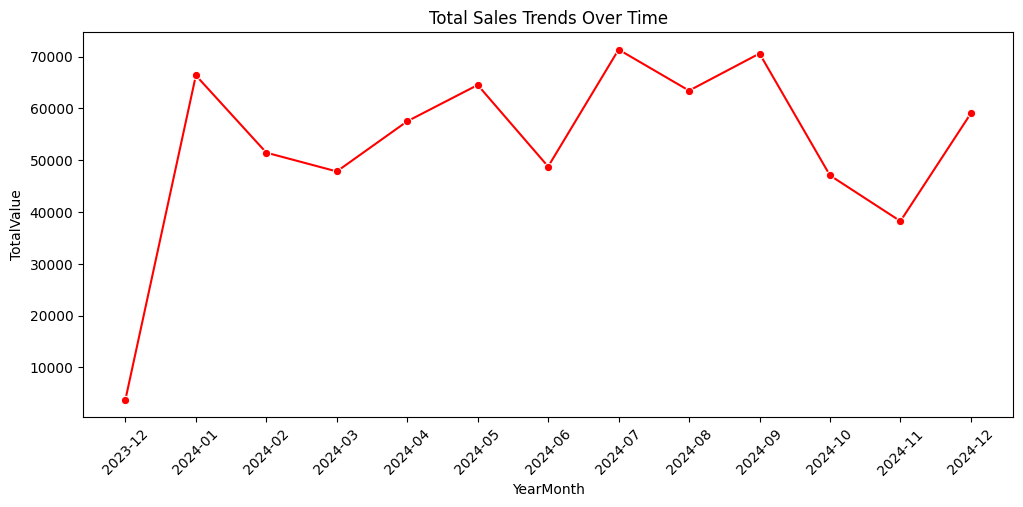

In [20]:
# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract 'YearMonth' and convert to string format
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period("M").astype(str)

# Sales Trends Over Time
plt.figure(figsize=(12,5))
sns.lineplot(data=transactions.groupby('YearMonth')['TotalValue'].sum().reset_index(), x='YearMonth', y='TotalValue', marker='o', color='red')

plt.title("Total Sales Trends Over Time")
plt.xticks(rotation=45)
plt.show()


<ipython-input-17-35088a7a53f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='magma')


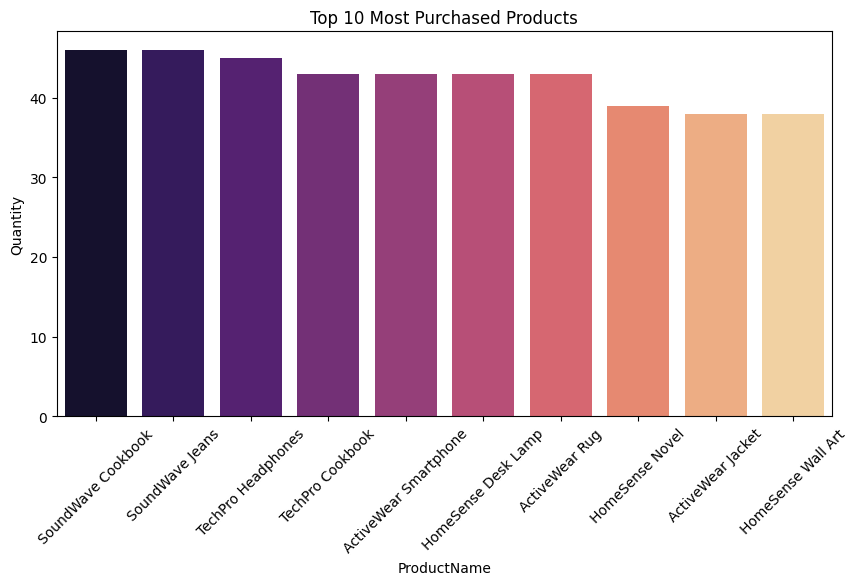

In [17]:
top_products = transactions.groupby("ProductID")["Quantity"].sum().nlargest(10).reset_index()
top_products = top_products.merge(products, on="ProductID", how="left")

plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='magma')
plt.title("Top 10 Most Purchased Products")
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-7f2cdc1ebb6c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='plasma')


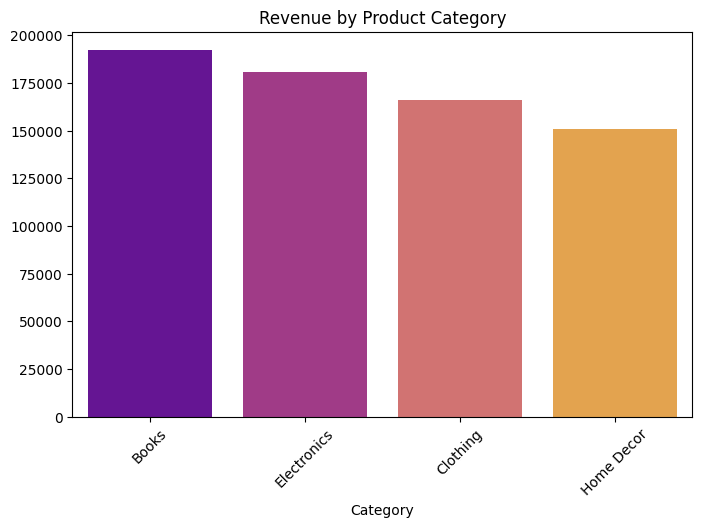

In [18]:
# Revenue per Product Category
merged_data = transactions.merge(products, on='ProductID', how='left')
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='plasma')
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

# **Customer Purchase Behaviour**

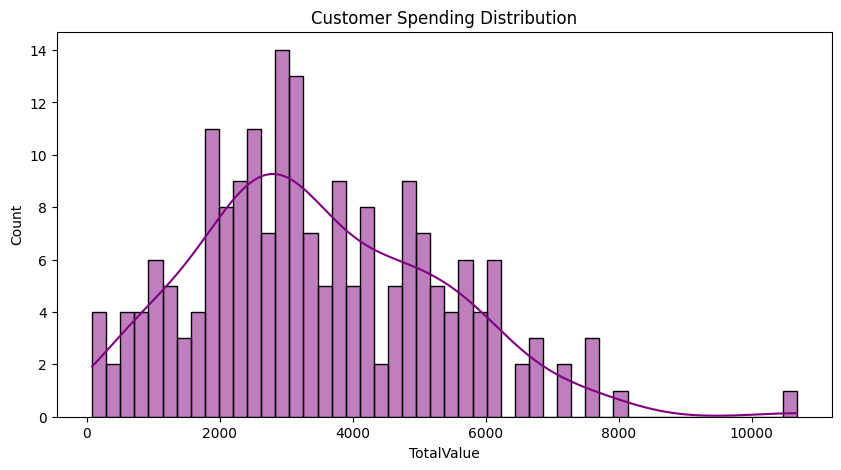

In [19]:

customer_spending = transactions.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.histplot(customer_spending, bins=50, kde=True, color='purple')
plt.title("Customer Spending Distribution")
plt.show()